<a href="https://colab.research.google.com/github/it21161742/DL_lab05/blob/main/IT21161742_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [143]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [144]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [145]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [146]:
# Load Data
file_path = '/content/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [147]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [148]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [149]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [150]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [151]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=120, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=120, return_sequences=True))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(LSTM(units=120, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [152]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=120, batch_size=10, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.2856
Epoch 2/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.1355
Epoch 3/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - loss: 0.1218
Epoch 4/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.1076
Epoch 5/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.1017
Epoch 6/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0987
Epoch 7/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.1160
Epoch 8/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.1182
Epoch 9/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - loss: 0.0906
Epoch 10/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0996
Epoch 11/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0891
Epoch 12/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.1048
Epoch 13/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0908
Epoch 14/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - loss: 0.0924
Epoch 15/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [153]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


In [154]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

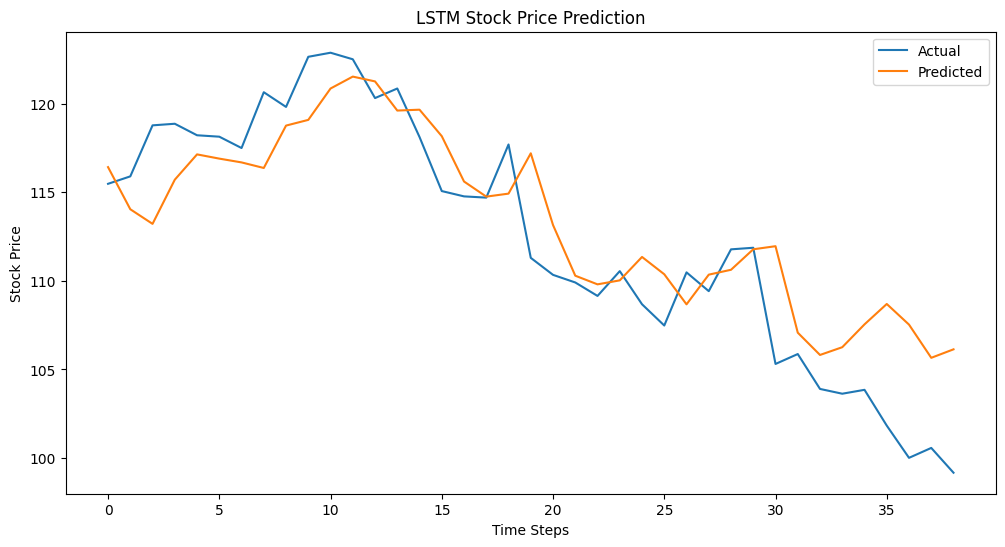

In [155]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
#1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

Normalization involves scaling the data to a specific range, typically between 0 and 1. The purposes of normalizing the 'Close' prices are:

Improved Training Efficiency: Normalized data helps the model converge
faster during training because the gradients are more stable, and the optimization process is more efficient.

* Preventing Bias Towards Larger Values: Stock prices can vary greatly in magnitude. Without normalization, larger values could dominate the learning process, causing the model to perform poorly.

* Enhanced Model Performance: Normalization ensures that all input features contribute equally to the result, leading to better accuracy and performance.

* Reducing Computational Complexity: Working with smaller, scaled values reduces the computational load and helps in achieving numerical stability.

### Summary: Normalizing 'Close' prices ensures that the data is scaled appropriately for the LSTM model to learn effectively, leading to faster convergence and improved prediction accuracy.

#2.	What is the purpose of the Dropout layer in the LSTM model?

Dropout is a regularization technique where a fraction of neurons is randomly ignored during training. The purposes of using Dropout layers in the LSTM model are:

* Preventing Overfitting: By randomly dropping neurons, the model is less likely to become too tailored to the training data and can generalize better to unseen data.

* Encouraging Redundancy: Dropout forces the network to learn multiple independent representations of the data, as no single neuron can rely solely on others during training.

* Improving Robustness: The model becomes more robust and less sensitive to specific weights, which enhances its ability to perform well on new, unseen data.

* Reducing Interdependent Learning: It prevents neurons from co-adapting too much, ensuring that the network captures a wide variety of features.

#### How It Works: During each training iteration, dropout randomly sets a percentage (e.g., 20%) of the input units to zero. During inference, all neurons are used but their outputs are scaled down to account for the dropout during training.

#### Summary: The Dropout layers help the LSTM model avoid overfitting by randomly deactivating neurons during training, leading to a more generalized and robust model that performs better on new data.

#3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

When the predicted line closely follows the actual line in the plot:

* Indicates High Accuracy: The model has successfully learned the underlying patterns and trends in the data, making accurate predictions.

* Demonstrates Good Model Fit: The close alignment shows that the model's outputs match the real stock prices well, suggesting a good fit to the training data.

* Reflects Effective Learning: It signifies that the chosen model architecture, along with its parameters and training process, effectively captured the temporal dependencies and complexities of the stock price movements.

* Suggests Reliable Predictions: Such performance implies that the model may be reliable for making future predictions, assuming the data patterns remain consistent.

#### Caution: While a close fit is desirable, it's also important to ensure that the model is not overfitting, meaning it performs equally well on new, unseen data and not just the training dataset.

#### Summary: If the predicted line closely follows the actual stock prices in the plot, it indicates that the LSTM model is accurately capturing and predicting the stock price movements, demonstrating effective learning and high predictive performance.
